In [38]:
import pandas as pd
import sqlite3
import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline

In [39]:
# Let's clean the data
data = sqlite3.connect("../pui_final_data/FPA_FOD_20170508.sqlite")
test = pd.read_sql_query("SELECT * FROM 'fires'",data)
wf = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,FIPS_NAME FROM 'Fires'", data)

In [40]:
wf['DISCOVERY_DATE'] = pd.to_datetime(wf['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
wf['DISCOVERY_DATE']

0         2005-02-02
1         2004-05-12
2         2004-05-31
3         2004-06-28
4         2004-06-28
             ...    
1880460   2015-09-26
1880461   2015-10-05
1880462   2015-05-02
1880463   2015-10-14
1880464   2015-03-14
Name: DISCOVERY_DATE, Length: 1880465, dtype: datetime64[ns]

In [41]:
wf['MONTH'] = wf['DISCOVERY_DATE'].dt.month
wf.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,FIPS_NAME,MONTH
0,2005,Miscellaneous,40.036944,-121.005833,CA,2005-02-02,0.10,Plumas,2
1,2004,Lightning,38.933056,-120.404444,CA,2004-05-12,0.25,Placer,5
2,2004,Debris Burning,38.984167,-120.735556,CA,2004-05-31,0.10,El Dorado,5
3,2004,Lightning,38.559167,-119.913333,CA,2004-06-28,0.10,Alpine,6
4,2004,Lightning,38.559167,-119.933056,CA,2004-06-28,0.10,Alpine,6


In [42]:
wf['DAY'] = wf['DISCOVERY_DATE'].dt.day
wf.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,FIPS_NAME,MONTH,DAY
0,2005,Miscellaneous,40.036944,-121.005833,CA,2005-02-02,0.10,Plumas,2,2
1,2004,Lightning,38.933056,-120.404444,CA,2004-05-12,0.25,Placer,5,12
2,2004,Debris Burning,38.984167,-120.735556,CA,2004-05-31,0.10,El Dorado,5,31
3,2004,Lightning,38.559167,-119.913333,CA,2004-06-28,0.10,Alpine,6,28
4,2004,Lightning,38.559167,-119.933056,CA,2004-06-28,0.10,Alpine,6,28


In [43]:
len(wf)

1880465

In [44]:
# wf = wf[wf['STATE'] == 'CA']
# wf['STATE'].unique()

In [45]:
wf.columns= wf.columns.str.lower()
wf.head()

,fire_year,stat_cause_descr,latitude,longitude,state,discovery_date,fire_size,fips_name,month,day
0,2005,Miscellaneous,40.036944,-121.005833,CA,2005-02-02,0.10,Plumas,2,2
1,2004,Lightning,38.933056,-120.404444,CA,2004-05-12,0.25,Placer,5,12
2,2004,Debris Burning,38.984167,-120.735556,CA,2004-05-31,0.10,El Dorado,5,31
3,2004,Lightning,38.559167,-119.913333,CA,2004-06-28,0.10,Alpine,6,28
4,2004,Lightning,38.559167,-119.933056,CA,2004-06-28,0.10,Alpine,6,28


In [46]:
wf = wf.rename(columns={"fire_year":"year","fips_name":"county","stat_cause_descr":"cause"})
wf.head()

,year,cause,latitude,longitude,state,discovery_date,fire_size,county,month,day
0,2005,Miscellaneous,40.036944,-121.005833,CA,2005-02-02,0.10,Plumas,2,2
1,2004,Lightning,38.933056,-120.404444,CA,2004-05-12,0.25,Placer,5,12
2,2004,Debris Burning,38.984167,-120.735556,CA,2004-05-31,0.10,El Dorado,5,31
3,2004,Lightning,38.559167,-119.913333,CA,2004-06-28,0.10,Alpine,6,28
4,2004,Lightning,38.559167,-119.933056,CA,2004-06-28,0.10,Alpine,6,28


In [47]:
wf.to_csv('./data/wildfre_cleaned.csv',index=False)

In [48]:
wf.describe()

,year,latitude,longitude,fire_size,month,day
count,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06
mean,2.003710e+03,3.678121e+01,-9.570494e+01,7.452016e+01,5.930107e+00,1.551281e+01
std,6.663099e+00,6.139031e+00,1.671694e+01,2.497598e+03,2.954900e+00,8.798520e+00
min,1.992000e+03,1.793972e+01,-1.788026e+02,1.000000e-05,1.000000e+00,1.000000e+00
25%,1.998000e+03,3.281860e+01,-1.103635e+02,1.000000e-01,3.000000e+00,8.000000e+00
50%,2.004000e+03,3.545250e+01,-9.204304e+01,1.000000e+00,6.000000e+00,1.500000e+01
75%,2.009000e+03,4.082720e+01,-8.229760e+01,3.300000e+00,8.000000e+00,2.300000e+01
max,2.015000e+03,7.033060e+01,-6.525694e+01,6.069450e+05,1.200000e+01,3.100000e+01


In [49]:
wf['county'].isnull().sum()

678148

In [50]:
fire_map = gpd.read_file('./data/tl_2019_us_state.shp')

In [51]:
fire_map.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


In [52]:
wf=wf[wf['year'] == 2015]

In [53]:
geometry = [Point(xy) for xy in zip(wf['longitude'],wf['latitude'])]
geometry[:3]

In [54]:
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(wf,crs=crs,geometry=geometry)
geo_df.head()

/Users/mellomoka/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,year,cause,latitude,longitude,state,discovery_date,fire_size,county,month,day,geometry
1789011,2015,Lightning,45.934167,-113.020833,MT,2015-08-14,0.10,Beaverhead,8,14,POINT (-113.02083 45.93417)
1789012,2015,Lightning,45.515278,-113.245278,MT,2015-08-20,6313.00,Beaverhead,8,20,POINT (-113.24528 45.51528)
1789013,2015,Lightning,45.727222,-112.943889,MT,2015-07-14,0.25,Beaverhead,7,14,POINT (-112.94389 45.72722)
1789014,2015,Lightning,45.455556,-113.749722,MT,2015-08-14,0.10,Beaverhead,8,14,POINT (-113.74972 45.45556)
1789015,2015,Miscellaneous,44.416667,-112.843333,MT,2015-09-29,0.10,Beaverhead,9,29,POINT (-112.84333 44.41667)


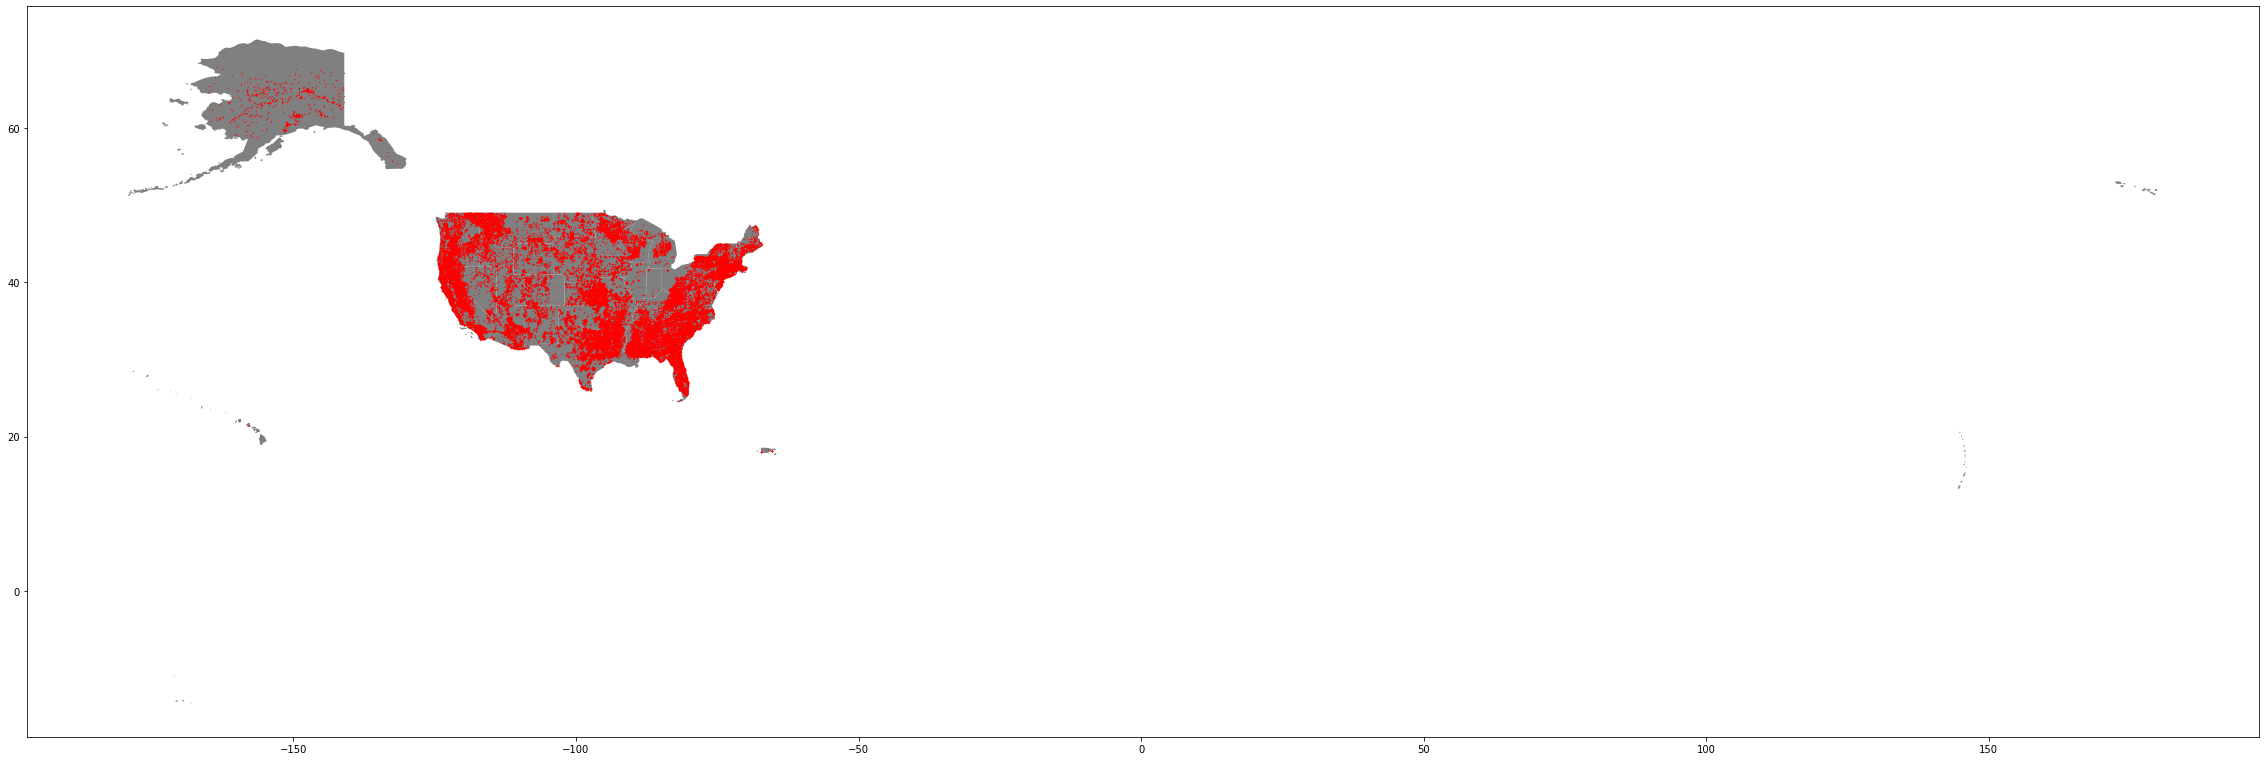

In [57]:
fig,ax = plt.subplots(figsize=(40,40))
fire_map.plot(ax=ax,color='grey')
geo_df.plot(ax=ax,markersize = 0.1, color='red',marker='o')